In [28]:
# Let's load and inspect the dataset to understand its structure before performing preprocessing and checking for outliers.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py # Importing plotly from the chart_studio package
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os

# Load the dataset
df = pd.read_csv('/content/jm1.csv')

# Display the first few rows and basic info about the dataset
df.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.5 MB/s eta 0:00:00


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True


In [2]:
# Convert the object columns that should be numeric
object_columns = ['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

# Attempt conversion to numeric, errors='coerce' will convert invalid parsing to NaN
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values after conversion
missing_values = df.isnull().sum()

# Check for summary statistics to get a sense of numeric columns for outlier detection
summary_statistics = df.describe()

missing_values, summary_statistics


(loc                  0
 v(g)                 0
 ev(g)                0
 iv(g)                0
 n                    0
 v                    0
 l                    0
 d                    0
 i                    0
 e                    0
 b                    0
 t                    0
 lOCode               0
 lOComment            0
 lOBlank              0
 locCodeAndComment    0
 uniq_Op              5
 uniq_Opnd            5
 total_Op             5
 total_Opnd           5
 branchCount          5
 defects              0
 dtype: int64,
                 loc          v(g)         ev(g)         iv(g)             n  \
 count  10885.000000  10885.000000  10885.000000  10885.000000  10885.000000   
 mean      42.016178      6.348590      3.401047      4.001599    114.389738   
 std       76.593332     13.019695      6.771869      9.116889    249.502091   
 min        1.000000      1.000000      1.000000      1.000000      0.000000   
 25%       11.000000      2.000000      1.000000      1.0

In [33]:
# Replace '?' with NaN in the entire DataFrame
df = df.replace('?', np.nan)

# Convert relevant columns to numeric (e.g., columns used for correlation)
# Specify the columns you want to convert to numeric (e.g., 'column1', 'column2', etc.)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle cases where the column cannot be converted to numeric (e.g., string columns)
        pass

trace = go.Histogram(
    x=df.defects,
    opacity=0.75,
    name="Defects",
    marker=dict(color='green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title='Defects',
                   xaxis=dict(title='True - False'),
                   yaxis=dict(title='Frequency'),
)
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

# Now calculate the correlation
df.corr()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.817757,0.517551,0.784057,0.881795,0.900293,-0.286587,0.689543,0.499946,0.750564,...,0.921918,0.612858,0.803573,0.278119,0.536681,0.764622,0.880967,0.868275,0.830194,0.245388
v(g),0.817757,1.000000,0.701710,0.859590,0.730781,0.759881,-0.252902,0.669057,0.303031,0.709501,...,0.799915,0.384506,0.538366,0.209811,0.647430,0.700514,0.744164,0.696078,0.971958,0.208644
ev(g),0.517551,0.701710,1.000000,0.639574,0.465992,0.445902,-0.233982,0.434009,0.213211,0.315538,...,0.454604,0.294208,0.338243,0.190911,0.263000,0.337031,0.479935,0.435518,0.785553,0.172973
iv(g),0.784057,0.859590,0.639574,1.000000,0.702415,0.743193,-0.197736,0.575369,0.309717,0.757702,...,0.775873,0.351583,0.541296,0.207028,0.500750,0.617966,0.715244,0.668940,0.858994,0.181984
n,0.881795,0.730781,0.465992,0.702415,1.000000,0.984276,-0.240749,0.808113,0.651209,0.716536,...,0.944383,0.596374,0.798561,0.284391,0.610412,0.836171,0.995689,0.989484,0.747894,0.204143
v,0.900293,0.759881,0.445902,0.743193,0.984276,1.000000,-0.198104,0.752206,0.598743,0.800000,...,0.962078,0.576844,0.792330,0.266537,0.606993,0.852296,0.981565,0.971960,0.759971,0.189136
l,-0.286587,-0.252902,-0.233982,-0.197736,-0.240749,-0.198104,1.000000,-0.347215,-0.166801,-0.062026,...,-0.218373,-0.165885,-0.223670,-0.106117,-0.305331,-0.234892,-0.237325,-0.241023,-0.279126,-0.164917
d,0.689543,0.669057,0.434009,0.575369,0.808113,0.752206,-0.347215,1.000000,0.398162,0.574298,...,0.768188,0.502121,0.637211,0.253793,0.749305,0.639686,0.817546,0.777732,0.671976,0.169629
i,0.499946,0.303031,0.213211,0.309717,0.651209,0.598743,-0.166801,0.398162,1.000000,0.209268,...,0.563920,0.392551,0.572352,0.217810,0.391646,0.726696,0.620676,0.687891,0.325796,0.192831
e,0.750564,0.709501,0.315538,0.757702,0.716536,0.800000,-0.062026,0.574298,0.209268,1.000000,...,0.809070,0.384806,0.600649,0.148693,0.482061,0.586805,0.735802,0.673490,0.667886,0.086036


In [3]:
# Dropping rows with missing values since they are few in number (only 5 rows)
df_cleaned = df.dropna()

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    # Outliers are points outside 1.5 times the IQR from Q1 and Q3
    is_outlier = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
    return is_outlier.sum()

# Detect outliers in the numerical columns
numerical_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
outliers_count = df_cleaned[numerical_columns].apply(detect_outliers_iqr)

outliers_count


,0
loc,964
v(g),953
ev(g),1369
iv(g),965
n,1006
v,1106
l,1131
d,574
i,655
e,1578


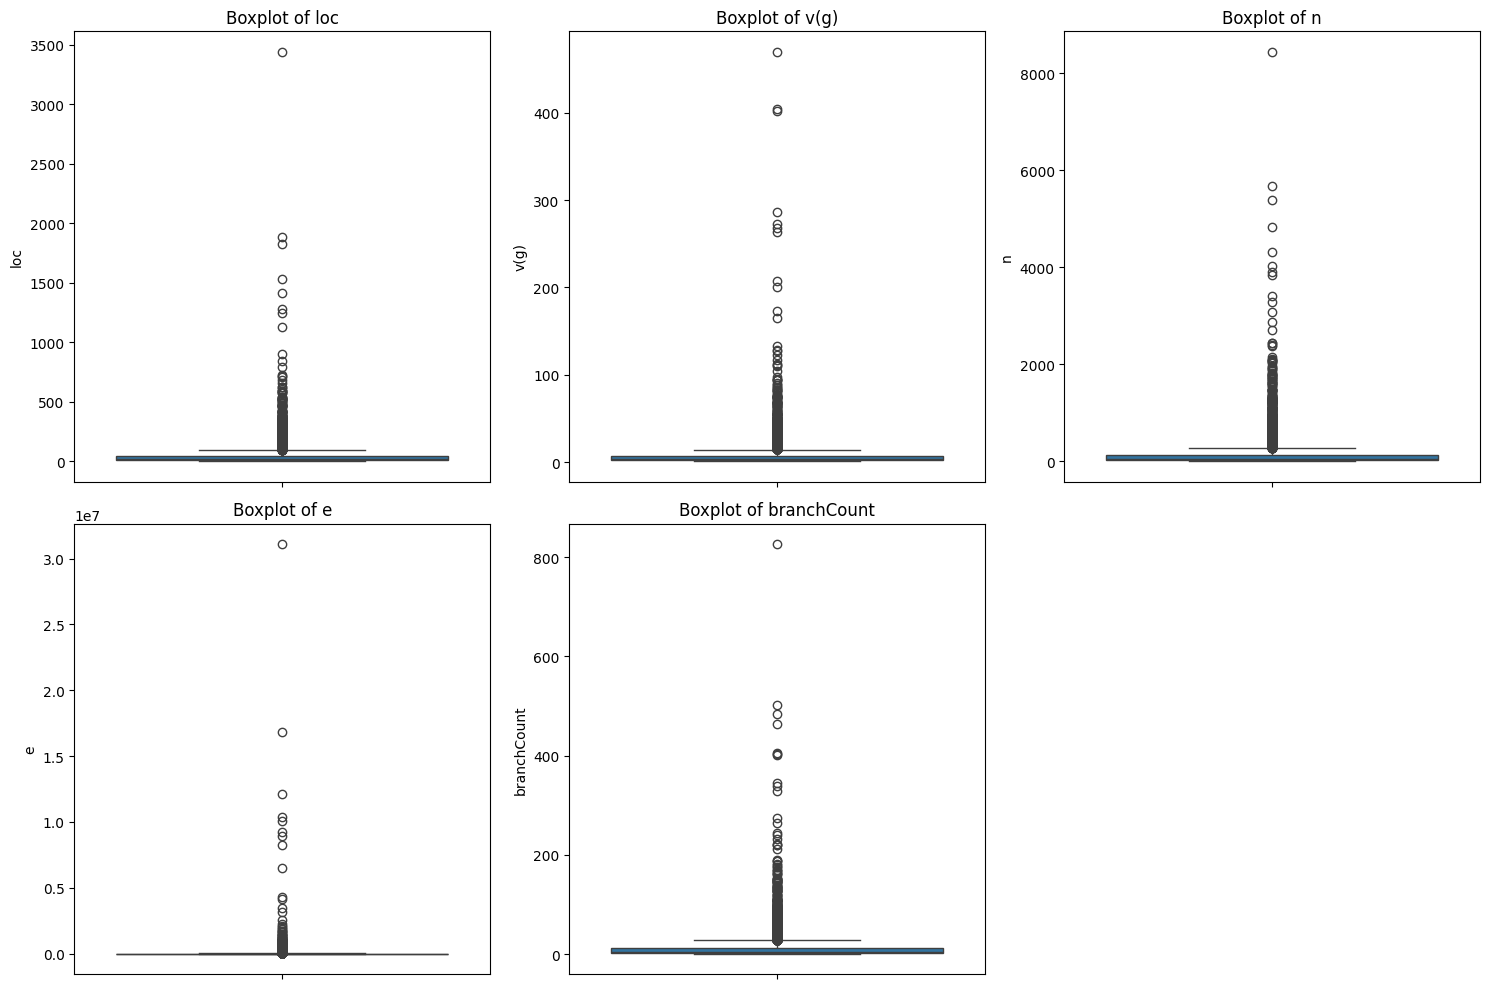

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define columns with high outlier counts for visualization
columns_to_plot = ['loc', 'v(g)', 'n', 'e', 'branchCount']

# Set up the figure for multiple boxplots
plt.figure(figsize=(15, 10))

# Generate boxplots for selected columns
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()


In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

# Load the dataset (assuming it's already cleaned and in 'df_cleaned')
# Normalize the data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_cleaned.select_dtypes(include=[np.number]))

# Split the data into training and test sets
X_train, X_test = train_test_split(df_scaled, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  # You can adjust this as per the compression level needed

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

# Decoder
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer="adam", loss="mean_squared_error")

# Train the model
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=32,
                shuffle=True,
                validation_data=(X_test, X_test))

# Use the trained autoencoder to predict (reconstruct) the test data
reconstructed = autoencoder.predict(X_test)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.power(X_test - reconstructed, 2), axis=1)

# Set a threshold for detecting outliers (can be adjusted)
threshold = np.percentile(reconstruction_error, 95)  # 95th percentile

# Identify outliers
outliers = reconstruction_error > threshold

# Display the results
print(f"Number of outliers detected: {np.sum(outliers)}")


Epoch 1/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1785 - val_loss: 0.0031
Epoch 2/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 3/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 5/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 6/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0015 - val_loss: 0.0016
Epoch 7/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 8/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0014 - val_loss: 0.0010
Epoch 9/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0013 - val_loss: 9.5567e-04
Epoch 10/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.7011e-04 - val_loss: 9.0538e-04
Epoch 11/50
272/272 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9.9938e-04 - val_loss: 5.6201e-04
Epoch 12/50
272/272 ━━━━━━━━━━━━

In [83]:
!pip install catboost

In [88]:
#catboost for classification
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the clean dataset)
# Separate the features and target (here assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8203
Classification Report:
              precision    recall  f1-score   support

       False       0.84      0.96      0.90      1757
        True       0.58      0.25      0.35       419

    accuracy                           0.82      2176
   macro avg       0.71      0.60      0.62      2176
weighted avg       0.79      0.82      0.79      2176



In [89]:
#catboost for regression
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Initialize CatBoostRegressor
catboost_model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train the model
catboost_model.fit(X_train, y_train)

# Predict on the test set
y_pred = catboost_model.predict(X_test)

# Evaluate the performance
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse:.4f}")

RMSE: 0.3709


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [90]:
#XGBoost for classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the cleaned dataset)
# Separate features and target (assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8084
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.96      0.89      1757
        True       0.51      0.17      0.25       419

    accuracy                           0.81      2176
   macro avg       0.67      0.56      0.57      2176
weighted avg       0.77      0.81      0.77      2176



In [91]:
#XGBoost for classification
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the cleaned dataset)
# Separate features and target (assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBClassifier
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.8084
Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.96      0.89      1757
        True       0.51      0.17      0.25       419

    accuracy                           0.81      2176
   macro avg       0.67      0.56      0.57      2176
weighted avg       0.77      0.81      0.77      2176



In [92]:
#XGBoost for regression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse:.4f}")

RMSE: 0.3722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [93]:
# ADaboost for classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess the dataset (assuming df_cleaned is the cleaned dataset)
# Separate the features and target (assuming 'defects' is the target)
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.8074
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.97      0.89      1757
        True       0.50      0.13      0.20       419

    accuracy                           0.81      2176
   macro avg       0.66      0.55      0.55      2176
weighted avg       0.76      0.81      0.76      2176



In [94]:
#ADaboost for regression
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBRegressor
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the performance (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"RMSE: {rmse:.4f}")

RMSE: 0.3722


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [95]:
# prompt: perform a hybrid model of catboost+Adaboost+XGboost

# ... (Your existing code for data loading, preprocessing, and individual model training) ...

# Hybrid Model (CatBoost + AdaBoost + XGBoost)
# We will use CatBoost for initial prediction, then AdaBoost and XGBoost to refine it.

# Separate features and target
X = df_cleaned.drop('defects', axis=1)
y = df_cleaned['defects']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoostClassifier
catboost_model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=0)

# Train CatBoost
catboost_model.fit(X_train, y_train)

# Get initial predictions from CatBoost
y_pred_catboost = catboost_model.predict(X_train)


# Train AdaBoost using CatBoost's predictions as input
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=1.0)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_train)

# Train XGBoost using AdaBoost's predictions as input
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_train)

# Combine predictions using voting or averaging
# (Here, we'll use a simple majority vote)
y_pred_hybrid = []
for i in range(len(y_pred_catboost)):
  votes = [y_pred_catboost[i], y_pred_ada[i], y_pred_xgb[i]]
  prediction = max(set(votes), key=votes.count)
  y_pred_hybrid.append(prediction)

# Evaluate the hybrid model on the test set
y_pred_test_catboost = catboost_model.predict(X_test)
y_pred_test_ada = ada_model.predict(X_test)
y_pred_test_xgb = xgb_model.predict(X_test)

y_pred_test_hybrid = []
for i in range(len(y_pred_test_catboost)):
  votes = [y_pred_test_catboost[i], y_pred_test_ada[i], y_pred_test_xgb[i]]
  prediction = max(set(votes), key=votes.count)
  y_pred_test_hybrid.append(prediction)

accuracy_hybrid = accuracy_score(y_test, y_pred_test_hybrid)
classification_rep_hybrid = classification_report(y_test, y_pred_test_hybrid)

print(f"Hybrid Model Accuracy: {accuracy_hybrid:.4f}")
print("Hybrid Model Classification Report:")
print(classification_rep_hybrid)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Hybrid Model Accuracy: 0.8125
Hybrid Model Classification Report:
              precision    recall  f1-score   support

       False       0.83      0.97      0.89      1757
        True       0.54      0.16      0.25       419

    accuracy                           0.81      2176
   macro avg       0.69      0.56      0.57      2176
weighted avg       0.77      0.81      0.77      2176



In [96]:
defect_true_false = df.groupby('defects')['b'].apply(lambda x: x.count())
print('False: ',defect_true_false[0])
print('True: ',defect_true_false[1])

False:  8779
True:  2106


<ipython-input-96-0aca05d710d3>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-96-0aca05d710d3>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [98]:
# Replace '?' with NaN in the entire DataFrame
df = df.replace('?', np.nan)

# Convert relevant columns to numeric (e.g., columns used for correlation)
# Specify the columns you want to convert to numeric (e.g., 'column1', 'column2', etc.)
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle cases where the column cannot be converted to numeric (e.g., string columns)
        pass

trace = go.Histogram(
    x=df.defects,
    opacity=0.75,
    name="Defects",
    marker=dict(color='green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title='Defects',
                   xaxis=dict(title='True - False'),
                   yaxis=dict(title='Frequency'),
)
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

# Now calculate the correlation


In [103]:
# Replace '?' with NaN in the entire DataFrame
df = df.replace('?', np.nan)

# Convert relevant columns to numeric (e.g., columns used for correlation)
# Specify the columns you want to convert to numeric (e.g., 'column1', 'column2', etc.)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()  # Get list of numeric columns

for col in numeric_cols:  # Iterate through only numeric columns
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle cases where the column cannot be converted to numeric (e.g., string columns)
        pass

trace = go.Histogram(
    x=df.defects,
    opacity=0.75,
    name="Defects",
    marker=dict(color='green'))

hist_data = [trace]
hist_layout = go.Layout(barmode='overlay',
                   title='Defects',
                   xaxis=dict(title='True - False'),
                   yaxis=dict(title='Frequency'),
)
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

# Now calculate the correlation, selecting only numeric columns
correlation_matrix = df[numeric_cols].corr()  # Calculate correlation only for numeric columns
print(correlation_matrix) # print the result

                        loc      v(g)     ev(g)     iv(g)         n         v  \
loc                1.000000  0.817757  0.517551  0.784057  0.881795  0.900293   
v(g)               0.817757  1.000000  0.701710  0.859590  0.730781  0.759881   
ev(g)              0.517551  0.701710  1.000000  0.639574  0.465992  0.445902   
iv(g)              0.784057  0.859590  0.639574  1.000000  0.702415  0.743193   
n                  0.881795  0.730781  0.465992  0.702415  1.000000  0.984276   
v                  0.900293  0.759881  0.445902  0.743193  0.984276  1.000000   
l                 -0.286587 -0.252902 -0.233982 -0.197736 -0.240749 -0.198104   
d                  0.689543  0.669057  0.434009  0.575369  0.808113  0.752206   
i                  0.499946  0.303031  0.213211  0.309717  0.651209  0.598743   
e                  0.750564  0.709501  0.315538  0.757702  0.716536  0.800000   
b                  0.899965  0.759635  0.445693  0.743013  0.983938  0.999696   
t                  0.750564 

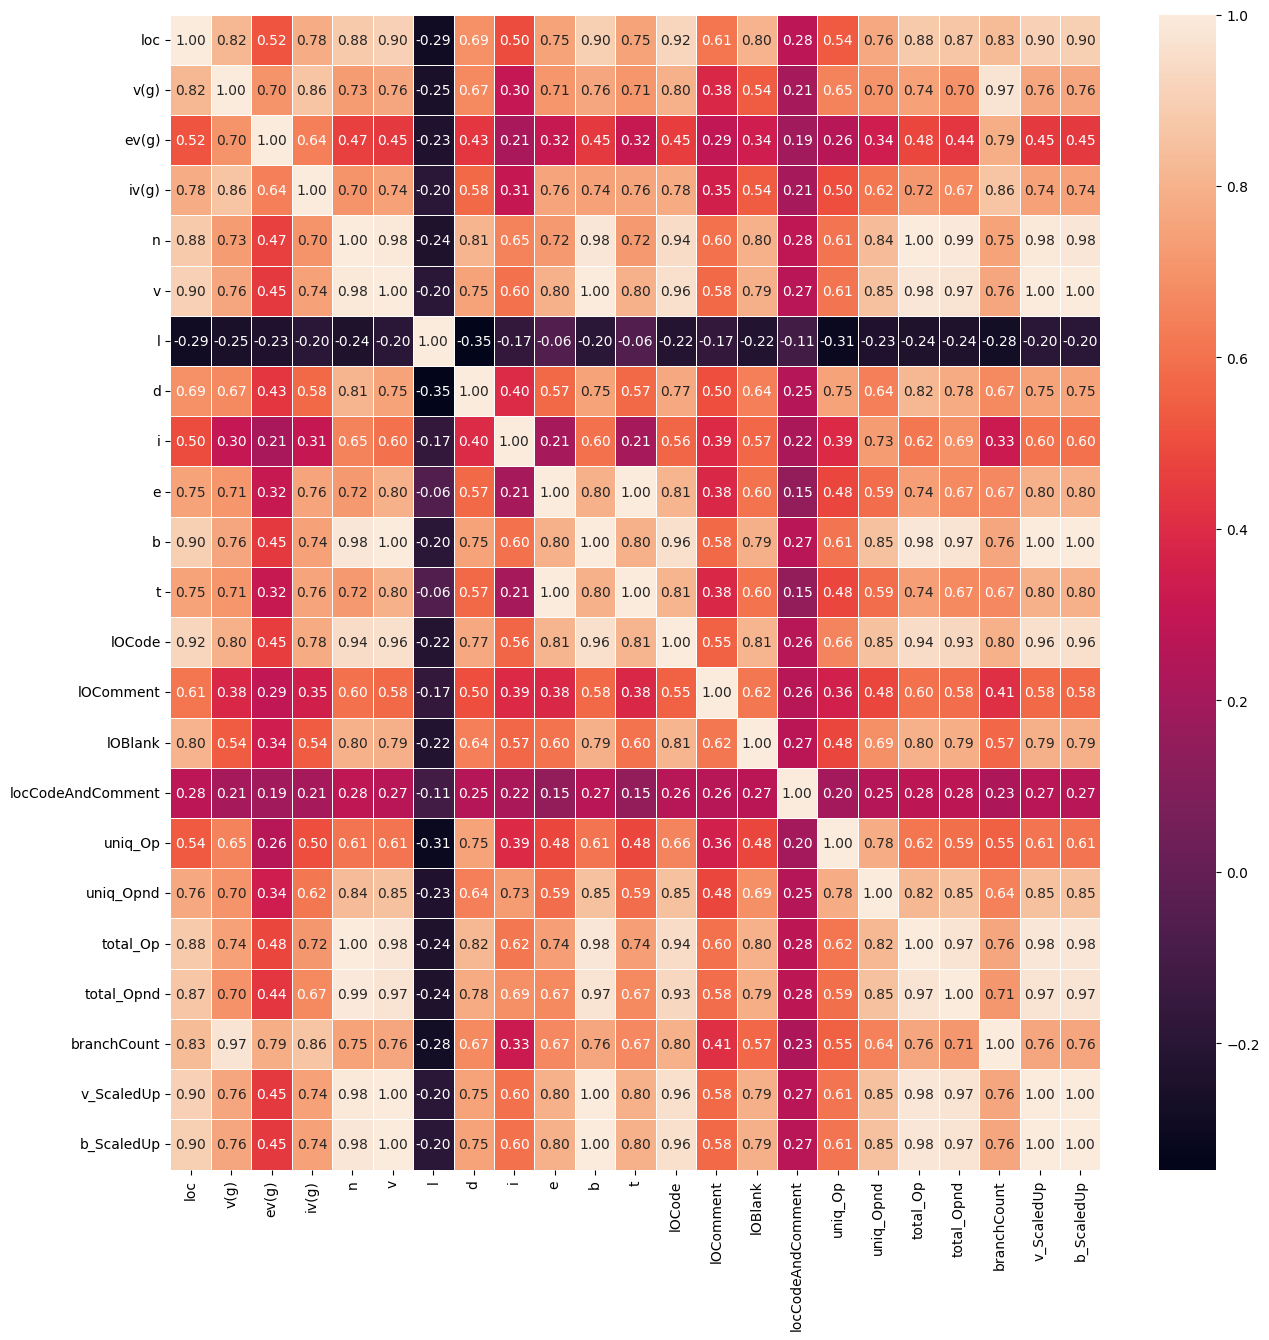

In [105]:
# Replace '?' with NaN in the entire DataFrame
df = df.replace('?', np.nan)

# Convert relevant columns to numeric (e.g., columns used for correlation)
# Specify the columns you want to convert to numeric (e.g., 'column1', 'column2', etc.)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()  # Get list of numeric columns

# Exclude 'defects' column from correlation calculation if it's not numeric
if 'defects' in df.columns and df['defects'].dtype == 'object':
    numeric_cols = [col for col in numeric_cols if col != 'defects']

for col in numeric_cols:  # Iterate through only numeric columns
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        # Handle cases where the column cannot be converted to numeric (e.g., string columns)
        pass


f,ax = plt.subplots(figsize = (15, 15))

# Calculate correlation only for numeric columns
correlation_matrix = df[numeric_cols].corr()

# Create the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot = True, linewidths = .5, fmt = '.2f')

plt.show()

In [106]:
trace = go.Scatter(
    x=df.v,
    y=df.b,
    mode="markers",
    name="Volume - Bug",
    marker=dict(color='darkblue'),
    text="Bug (b)")

scatter_data = [trace]
scatter_layout = dict(title='Volume - Bug',
              xaxis=dict(title='Volume', ticklen=5),
              yaxis=dict(title='Bug', ticklen=5),
             )
# The 'df' key should be replaced with 'data' for Plotly to recognize the figure data
fig = dict(data=scatter_data, layout=scatter_layout)
iplot(fig)

df.isnull().sum()


,0
loc,0
v(g),0
ev(g),0
iv(g),0
n,0
v,0
l,0
d,0
i,0
e,0


In [107]:
trace1 = go.Box(
    x = df.uniq_Op,
    name = 'Unique Operators',
    marker = dict(color = 'blue')
    )
box_data = [trace1]
iplot(box_data)
def evaluation_control(df):
      evaluation = (df.n < 300) & (df.v < 1000 ) & (df.d < 50) & (df.e < 500000) & (df.t < 5000)
      df['complexityEvaluation'] = pd.DataFrame(evaluation)
      df['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in data.complexityEvaluation]



In [108]:
def evaluation_control(df):
    evaluation = (df.n < 300) & (df.v < 1000 ) & (df.d < 50) & (df.e < 500000) & (df.t < 5000)
    df['complexityEvaluation'] = pd.DataFrame(evaluation)
    # Changed 'data' to 'df' in the list comprehension
    df['complexityEvaluation'] = ['Succesful' if evaluation == True else 'Redesign' for evaluation in df.complexityEvaluation]

In [109]:
evaluation_control(df)
df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [110]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [111]:
df.groupby("complexityEvaluation").size()


,0
complexityEvaluation,
Redesign,1725
Succesful,9160


In [112]:
trace = go.Histogram(
    x=df.complexityEvaluation,
    opacity=0.75,
    name='Complexity Evaluation',
    marker=dict(color='darkorange')
)
hist_data = [trace]
hist_layout = go.Layout(
    barmode='overlay',
    title='Complexity Evaluation',
    xaxis=dict(title='Succesful - Redesign'),
    yaxis=dict(title='Frequency')
)

# Change 'df' to 'data' in go.Figure
fig = go.Figure(data=hist_data, layout=hist_layout)
iplot(fig)

from sklearn import preprocessing

# Change 'data' to 'df' to access the DataFrame
scale_v = df[['v']]
scale_b = df[['b']]

minmax_scaler = preprocessing.MinMaxScaler()

v_scaled = minmax_scaler.fit_transform(scale_v)
b_scaled = minmax_scaler.fit_transform(scale_b)

# Change 'data' to 'df' to update the DataFrame
df['v_ScaledUp'] = pd.DataFrame(v_scaled)
df['b_ScaledUp'] = pd.DataFrame(b_scaled)

df

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,complexityEvaluation,v_ScaledUp,b_ScaledUp
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,1.2,1.2,1.2,1.2,1.4,False,Succesful,0.000016,0.048237
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1.0,1.0,1.0,1.0,1.0,True,Succesful,0.000012,0.037106
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,1,17.0,36.0,112.0,86.0,13.0,True,Redesign,0.014029,0.014100
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,2,17.0,135.0,329.0,271.0,5.0,True,Redesign,0.053793,0.053803
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,0,11.0,16.0,76.0,50.0,7.0,True,Succesful,0.007411,0.007421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,0,10.0,15.0,30.0,22.0,7.0,False,Succesful,0.002987,0.002968
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,0,12.0,8.0,19.0,11.0,3.0,False,Succesful,0.001604,0.001484
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,0,18.0,15.0,59.0,44.0,7.0,False,Succesful,0.006427,0.006308
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,0,9.0,8.0,21.0,15.0,1.0,False,Succesful,0.001820,0.001855


In [113]:
scaled_data = pd.concat([df.v , df.b , df.v_ScaledUp , df.b_ScaledUp], axis=1)
scaled_data

,v,b,v_ScaledUp,b_ScaledUp
0,1.30,1.30,0.000016,0.048237
1,1.00,1.00,0.000012,0.037106
2,1134.13,0.38,0.014029,0.014100
3,4348.76,1.45,0.053793,0.053803
4,599.12,0.20,0.007411,0.007421
...,...,...,...,...
10880,241.48,0.08,0.002987,0.002968
10881,129.66,0.04,0.001604,0.001484
10882,519.57,0.17,0.006427,0.006308
10883,147.15,0.05,0.001820,0.001855


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loc                   10885 non-null  float64
 1   v(g)                  10885 non-null  float64
 2   ev(g)                 10885 non-null  float64
 3   iv(g)                 10885 non-null  float64
 4   n                     10885 non-null  float64
 5   v                     10885 non-null  float64
 6   l                     10885 non-null  float64
 7   d                     10885 non-null  float64
 8   i                     10885 non-null  float64
 9   e                     10885 non-null  float64
 10  b                     10885 non-null  float64
 11  t                     10885 non-null  float64
 12  lOCode                10885 non-null  int64  
 13  lOComment             10885 non-null  int64  
 14  lOBlank               10885 non-null  int64  
 15  locCodeAndComment  

In [115]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)


X = df.iloc[:, :-10].values  #Select related attribute values for selection
Y = df.complexityEvaluation.values   #Select classification attribute values

In [116]:

Y

array(['Succesful', 'Succesful', 'Redesign', ..., 'Succesful',
       'Succesful', 'Succesful'], dtype=object)

In [117]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size = validation_size, random_state = seed)


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Random Forests Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Random Forests Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      0.99      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 316    3]
 [   0 1858]]
ACC:  0.9986219568213137


In [119]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)


In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("K-Nearest Neighbors Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

K-Nearest Neighbors Algorithm
              precision    recall  f1-score   support

    Redesign       0.98      0.96      0.97       319
   Succesful       0.99      1.00      0.99      1858

    accuracy                           0.99      2177
   macro avg       0.99      0.98      0.98      2177
weighted avg       0.99      0.99      0.99      2177

[[ 306   13]
 [   7 1851]]
ACC:  0.9908130454754249


In [121]:
from sklearn import tree
model = tree.DecisionTreeClassifier()


In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Summary of the predictions made by the classifier
print("Decision Tree Algorithm")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
#Accuracy score
from sklearn.metrics import accuracy_score
print("ACC: ",accuracy_score(y_pred,y_test))

Decision Tree Algorithm
              precision    recall  f1-score   support

    Redesign       1.00      1.00      1.00       319
   Succesful       1.00      1.00      1.00      1858

    accuracy                           1.00      2177
   macro avg       1.00      1.00      1.00      2177
weighted avg       1.00      1.00      1.00      2177

[[ 319    0]
 [   1 1857]]
ACC:  0.9995406522737712


Confusion Matrix:
[[1681   76]
 [ 315  104]]


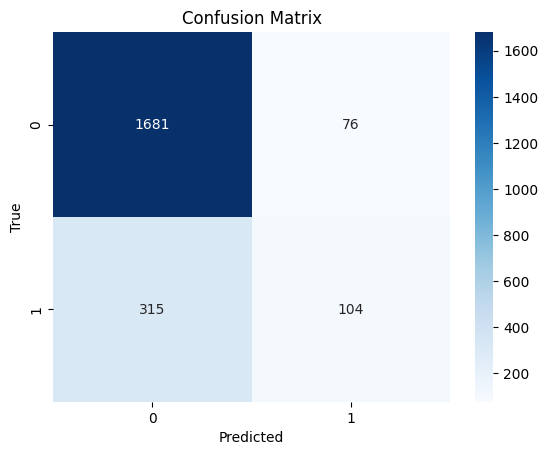

In [125]:
# prompt: generate code for confusion matrix

from sklearn.metrics import confusion_matrix

# Assuming you have y_test (true labels) and y_pred (predicted labels)

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

# You can also visualize the confusion matrix using seaborn:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

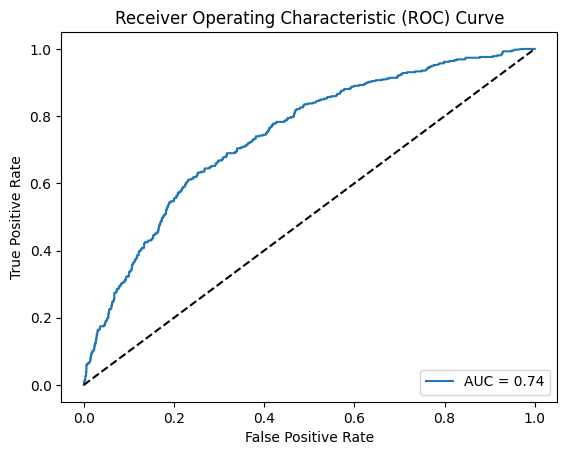

In [128]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have y_test (true labels) and y_pred_prob (predicted probabilities)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class
# The line above was commented out, causing the error. Uncommenting it should resolve the issue.

# Calculate the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()